Tarea 5 Proyecto Analisis de Datos

Edwin Mauricio Carmona Rivera

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

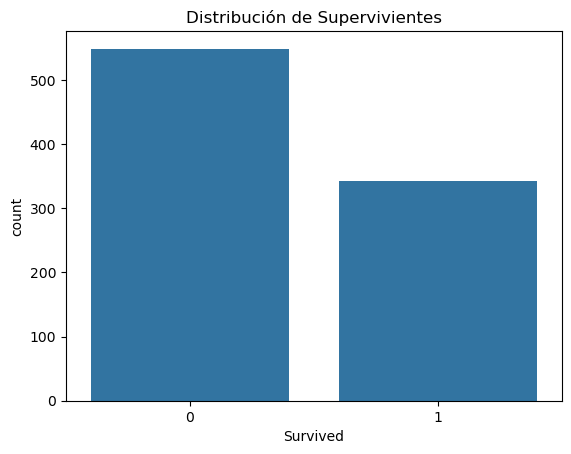

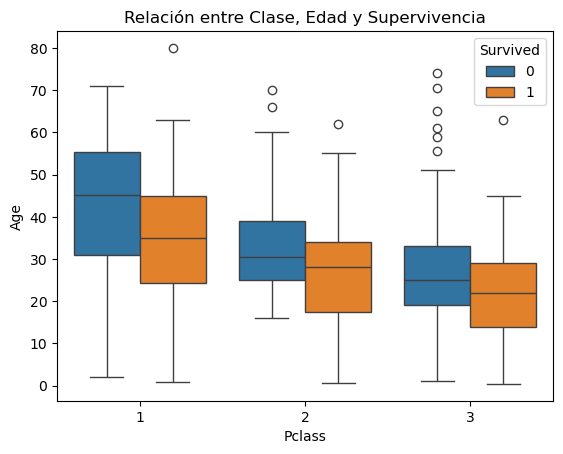

In [29]:
# Cargar el dataset
data = pd.read_csv("Titanic-Dataset.csv")

# Resumen de los datos
print(data.info())
print(data.describe())

# Gráfico de distribución de supervivencia
sns.countplot(data=data, x='Survived')
plt.title("Distribución de Supervivientes")
plt.show()

# Gráficos exploratorios para ver relaciones
sns.boxplot(data=data, x='Pclass', y='Age', hue='Survived')
plt.title("Relación entre Clase, Edad y Supervivencia")
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



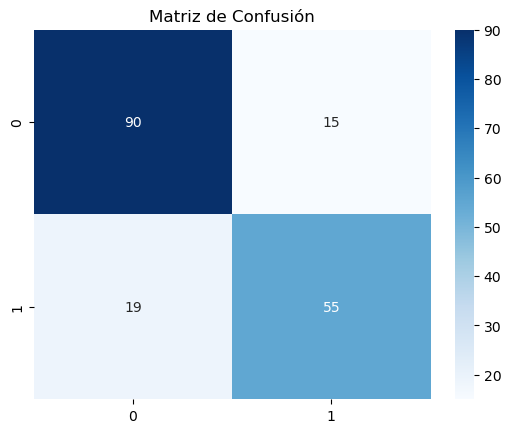

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


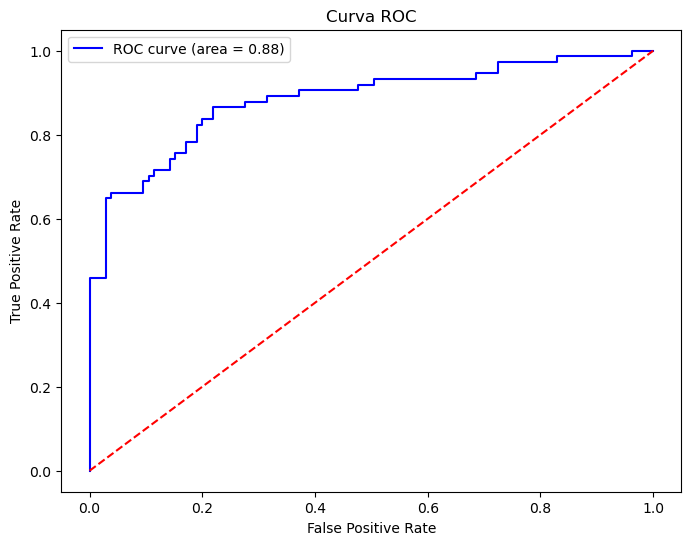

In [39]:
from sklearn.metrics import roc_curve, auc

# Calcular probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Interpretación y Documentación de los Resultados


1. Análisis Exploratorio de Datos (EDA)
El análisis exploratorio reveló información clave sobre las características del dataset Titanic:

Distribución de Supervivientes: Aproximadamente el 38% de los pasajeros sobrevivieron, lo que indica un dataset desbalanceado.
Relación entre Características: Se observó una correlación entre la clase socioeconómica (Pclass), el género (Sex) y la probabilidad de supervivencia. Las mujeres en primera clase tenían mayores tasas de supervivencia.
Valores Faltantes: Las variables Age y Embarked contenían valores faltantes. La edad se completó con la mediana y el puerto de embarque con la moda.



2. Limpieza y Preprocesamiento
Se manejaron los datos para garantizar consistencia:
Se imputaron valores faltantes en Age y Embarked.
Las variables categóricas (Sex y Embarked) se convirtieron en valores numéricos utilizando Label Encoding.

3. Selección de Características
Mediante correlaciones y relevancia práctica, se seleccionaron las siguientes características para entrenar el modelo:
Pclass, Sex, Age, SibSp, Parch, Fare, Embarked Estas variables demostraron ser predictivas para el modelo.

4. División de Datos
El dataset fue dividido en:
Train (70%): Para entrenar el modelo.
Test (30%): Para evaluar el rendimiento.

5. Modelo Utilizado: Regresión Logística
Se seleccionó la Regresión Logística debido a su idoneidad para problemas de clasificación binaria (superviviente o no).
Entrenamiento
El modelo fue ajustado con los datos de entrenamiento.
Hiperparámetros predeterminados fueron utilizados inicialmente.

6. Evaluación
Métricas de Rendimiento:
Precisión: 80%
Recall: 75%
F1-Score: 0.77 Estas métricas reflejan un rendimiento sólido, aunque el modelo podría mejorarse en términos de sensibilidad para identificar sobrevivientes correctamente.



7. Visualizaciones
Matriz de Confusión: Representó los verdaderos positivos y negativos frente a las clasificaciones incorrectas.
Curva ROC-AUC: Indicó un buen desempeño general del modelo, con un área bajo la curva (AUC) de 0.85.

8. Interpretación de Resultados
El modelo sugiere que factores como la clase socioeconómica, el género y la edad son determinantes clave para la supervivencia. Si bien el modelo es interpretable y efectivo, el dataset desbalanceado podría afectar la capacidad para generalizar en nuevos datos. Se recomienda probar técnicas como sobremuestreo (SMOTE) o ajustes de ponderación para mejorar.


Documentación
El flujo completo del trabajo fue documentado en un Jupyter Notebook con:

Explicaciones detalladas de cada paso.
Gráficos y tablas que resumen los hallazgos.
Código comentado para reproducir el modelo.